In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))

In [15]:
import torch
import torch.optim as optim
import gym
from torch.utils.tensorboard import SummaryWriter
from itertools import count
import matplotlib.pyplot as plt
from IPython import display

from networks.dqn_atari import DQN
from utils.memory import StandardReplayMemory
from utils.optimization import standard_optimization
from utils.atari_utils import select_action, get_state, eps_decay

In [9]:
device = 'cuda'

In [10]:
env = gym.make("Breakout-v0")
n_actions = env.action_space.n

In [11]:
policy_net = DQN(n_actions=n_actions).to(device)
policy_net = torch.load("models/dqn_expert_breakout_model")

In [16]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

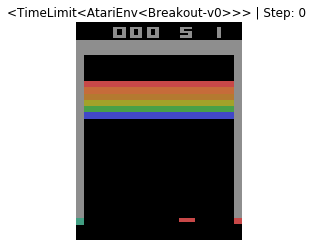

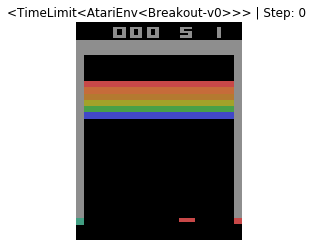

In [17]:
show_state(env)

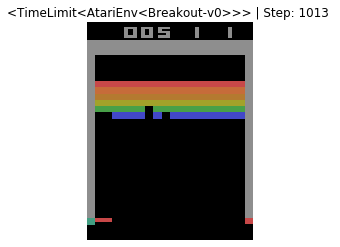

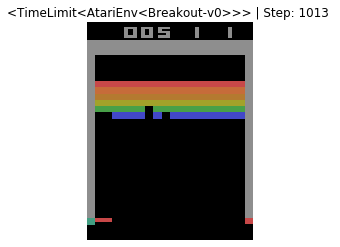

In [20]:
steps_done = 0
obs = env.reset()
state = get_state(obs)
show_state(env, steps_done)
for t in count():
  action = select_action(policy_net, state, 0.02, n_actions=n_actions)
  steps_done += 1
  obs, reward, done, info = env.step(action)
  
  if not done:
    next_state = get_state(obs)
  else:
    next_state = None
    
  state = next_state
  show_state(env, steps_done)
  
  if done:
    break